<a href="https://colab.research.google.com/github/nicolasbose/ReNOMO/blob/main/create_imb_parquet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import glob
import numpy as np

In [44]:
# Abrindo o Drive do Google
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
## Selecionando todos os arquivos txt do maregrafo de Imbituba
files = sorted(glob.glob('/content/imb/IMB*'))


In [138]:
## Load Data
df = pd.concat([pd.read_csv(file, sep=';') for file in files])
df.reset_index(inplace = True)

In [140]:
### Convert string to datetime
df['datetime'] = df['DT_LEITURA'] + ' ' + df['HR_LEITURA']

from datetime import datetime


datetime_object = []

for i in range(len(df)):
  datetime_object.append(datetime.strptime(df['datetime'][i], '%d/%m/%Y %H:%M:%S'))

# Replace comma to dots and remove '######'
df['RAD'] = df['RAD'].str.replace(',', '.')
df = df.apply(pd.to_numeric, errors='coerce')
df['RAD'] = df['RAD'].astype(float)

# Transforme time to datetime
df['datetime'] = pd.to_datetime(datetime_object)

In [147]:
# Remove colunms
df.drop(['index', 'DT_LEITURA', 'HR_LEITURA'], axis=1, inplace=True)

In [150]:
# Set datetime to index
df.index=df['datetime']

In [153]:
# Save file to parquet
df.to_parquet('imb_2023_mare.parquet')

<Axes: xlabel='datetime'>

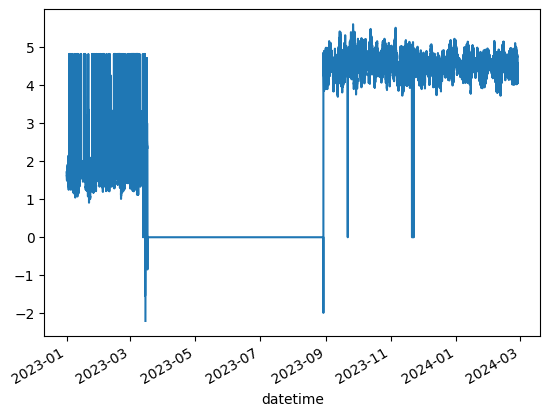

In [155]:
df.RAD.plot()